In [1]:
import gTranRec as gtr

/Users/travis/anaconda3/envs/astroconda/lib/python3.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa
Using TensorFlow backend.


This package needs GLADE catalog for cross-matching. Downloading by running:

In [ ]:
gtr.download.glade()

Using `gtr.pull()` to download the SCIENCE image from `gotohead` with given `obsdate` and `filename`.

In [2]:
sci_obsdate = '2019-06-06'
sci_fn = 'r0147009_UT3-median.fits'
gtr.pull(<username>, <password>,
        sci_obsdate, sci_fn)

In [5]:
# have a look at the structure of the SCIENCE image
!fitsinfo r0135770_UT1-median.fits

Filename: r0135770_UT1-median.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  IMAGE         1 PrimaryHDU     352   (8176, 6132)   float32   
  1  MASK          1 ImageHDU        13   (8176, 6132)   uint8   
  2  PHOTOMETRY    1 BinTableHDU    258   165349R x 60C   [E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, K, K, K, E, K, E, E, K, E, E, E, E, E, E, E, E, K, E, E, E, E, E, E, E, E, D, D, D, D, E]   
  3  PHOTOMETRY_DIFF    1 BinTableHDU    172   11435R x 79C   [E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, K, K, K, E, K, E, E, K, E, E, E, E, E, E, E, E, K, E, E, E, E, E, E, E, E, D, D, E, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 23A]   
  4  PHOTOMETRY_FORCE    1 BinTableHDU     76   24R x 31C   [K, E, E, E, E, E, E, E, D, D, E, E, L, E, E, E, E, E, E, E, E, E, E, K, E, E, E, E, E, K, K]   
  5  PHOTOMETRY_TEMPL    1 BinTableHDU    134   153632R x 60C   [

### One-line Command

If the SCIENCE FITS contains the TEMPLATE and the DIFFERENCE image extensions, you can directly run the main script `gtr.run()`. The main script `gtr.run()` would do all the things for you:
1. Template alignment
2. Image subtraction
3. Transient selection

In [2]:
# have a look at the input arguments of 'gRB.run'
gtr.run

<function gTranRec.run(sci_img, temp_img=None, inspect=True, score=0.5, thresh='1.5', xmatch=['ned', 'glade'], on_science=True, dm_sigma=None, filter_ned=True, filter_mp=True, near_galaxy=False, algorithm='rf')>

Arguments:
1. `sci_img`: filename of the SCIENCE image.
2. `temp_img`: filename of the TEMPLATE image. TEMPLATE and DIFFERENCE images are extracted from the SCIENCE image if `None`.
3. `inspect`: thumbnails report is generated if `True`.
4. `score`: cutoff real-bogus threshold.
5. `thresh`: `DETECT_THRESH` of `SExtractor`.
6. `xmatch`: catalog list for cross matching.
7. `on_science`: only pick candidates with coincident position on SCIENCE image if `True`.
8. `dm_sigma`: only pick candidates with $\Delta m$ greater than given $\sigma$.
9. `filter_ned`: only pick candidates not found in NED if `True`.
10. `filter_mp`: only pick candidates which are not minor planet if `True.`
11. `near_galaxy`: only pick candidates closed to GLADE galaxies within $20''$.
12. `algorithm`: model selection. (`ann`/`rf`)

Uncompressing images r0147009_UT3-median.fits
No input 'TEMPLATE', extracting from 'SCIENCE' FITS...


Running SExtractor on SCIENCE image and TEMPLATE, and creating detection table as HDU...
Running SExtractor on DIFFERENCE image and creating detection table as HDU...
Calculating real-bogus score for all detections in 'DETECTION_TABLE'...
Filtering FLAGS not equal to 0 or 2...
Filtering detections with too many masked pixels (>50).
Cross-matching with SCIENCE image...
Cross-matching with TEMPLATE image...
Calculating delta magnitude...
Filtering detections cannot be found on SCIENCE image...
Cross-matching with NED catalog...
Filtering known NED sources...
Cross-matching with GLADE catalog...
Minor Planet Checking...
Sorting catalog list of 795636 minor planets
into 156 jobs across 4 processors.
Got 2 matches
... of which 0 fall within the image footprint
Filtering Minor Planet...
Products from alipy are removed...
Time elapsed: 191.87767791748047


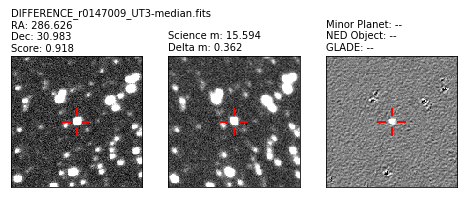

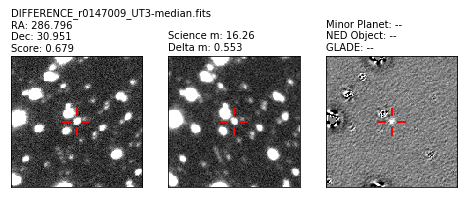

In [5]:
sci_fn = 'r0147009_UT3-median.fits'
gtr.run(sci_fn, temp_img=None, inspect=True, 
        score=0.5, thresh='1.5', xmatch=['ned', 'glade'], 
        on_science=True, dm_sigma=None, filter_ned=True, 
        filter_mp=True, near_galaxy=False, algorithm='rf'
        )

< DIFFERENCE >_report.pdf is created containing the above thumbnails and information for further inspection.

In [9]:
# have a look at the structure of the output file
!fitsinfo DIFFERENCE_r0135770_UT1-median.fits

Filename: DIFFERENCE_r0135770_UT1-median.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  DIFFERENCE    1 PrimaryHDU     430   (8176, 6132)   float32   
  1  DETECTION_TABLE    1 BinTableHDU     27   14645R x 9C   [D, D, D, D, D, D, D, D, D]   
  2  CANDIDATES_LIST    1 BinTableHDU     47   2R x 19C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
  3  SCIENCE       1 ImageHDU       353   (8176, 6132)   float32   
  4  TEMPLATE      1 ImageHDU       346   (8176, 6132)   float32   


If the SCIENCE image does not contain TEMPLATE and DIFFERENCE, you could download the TEMPLATE by yourself with `gtr.pull()` again and run `gtr.run()` with `temp_img=<TEMPLATE_FILENAME>`. The script would do the image alignment and the subtraction for you.

 ### Step-by-Step

Extracting image from SCIENCE image with `gRB.image_extract()`:

In [3]:
sci_fn = 'r0135770_UT1-median.fits'
gtr.image_extract(sci_fn, imgtype='TEMPLATE')

Image alignment with `gtr.image_align()`:

In [4]:
sci_fn = 'r0135770_UT1-median.fits'
temp_fn = 'TEMPLATE_r0135770_UT1-median.fits'
gtr.image_align(sci_fn, temp_fn, hdu=1) # if error occurs, try 'hdu=0'

##########  Preparing reference ...
No filter file found, using default filter
No NNW file found, using default NNW config
Number of sources in catalog : 224130
EXT_NUMBER values found in catalog : 1, 3, 4
I've selected 109621 sources
Making more quads, from quadlevel 0 ...
Made   35 quads from  500 stars (combi n=7 s=0 d=30.0)
Removing 0/35 duplicates
########## Processing TEMPLATE_r0135770_UT1-median.fits
No filter file found, using default filter
No NNW file found, using default NNW config
Number of sources in catalog : 108486
EXT_NUMBER values found in catalog : 1
I've selected 107999 sources
Making more quads, from quadlevel 0 ...
Made   35 quads from  500 stars (combi n=7 s=0 d=30.0)
Removing 0/35 duplicates
Finding 4 best candidates among 35 x 35 (ukn x ref)
We have a maximum of 35 quad pairs
Cand  1 (dist.   0.00001208) : Rotation   -0.000594 [deg], scale 0.999975
Cand  2 (dist.   0.00001410) : Rotation   -0.000594 [deg], scale 0.999975
Cand  3 (dist.   0.00001473) : Rotation  

Image subtraction with `HOTPANTS` using `gtr.image_subtract()`

In [6]:
sci_fn = 'r0135770_UT1-median.fits'
temp_fn = 'aligned_TEMPLATE_r0135770_UT1-median.fits'
gtr.image_subtract(sci_fn, temp_fn)

Creating `DETECTION_TABLE` extension table in the subtracted image using `gtr.get_coor()`:

In [8]:
diff_img = 'diff_r0135770_UT1-median.fits'
# arguments other than 'diff_img' are SExtractor input parameters 
# (see SExtractor documents for more details)
gtr.get_coor(diff_img, thresh='1.5', 
         detect_minarea='5',deblend_nthresh='16', 
         deblend_mincount='0.01')

Calculate real-bogus score for all detections in the subtracted image:

In [13]:
diff_img = 'diff_r0135770_UT1-median.fits'
m = gtr.rf_model._load_model()
m.calc_score(diff_img, image_type='IMAGE')